The purpose of this is to compare the inputs from Ayako for imputation vs what we've got
for imputation.

In [70]:
import polars as pl

In [71]:
expected = pl.read_parquet(
    "inputs/expected_imputation_2023_01"
)

# Convert date to string "YYYY-MM-DD"
expected = expected.with_columns(
    pl.col("date").dt.strftime("%Y-%m-%d").alias("date"),
)

actual = pl.read_parquet(
    "inputs/actual_imputed_2023_01.parquet",
)

In [72]:
import matplotlib.pyplot as plt

In [73]:
# Join expected and actual dataframes on 'date' and 'grid_id'
joined = expected.join(
    actual,
    on=["date", "grid_id"],
    how="full",
    suffix="_actual",
)
joined

grid_id,date,aot_daily,co_daily,omi_no2,v_wind,u_wind,rainfall,temp,pressure,thermal_radiation,low_veg,high_veg,dewpoint_temp,NO2_tropos,NO2_missing,aod,aod_missing,CO,CO_missing,elevation,water,shurub,urban,forest,savannas,month,day_of_year,cos_day_of_year,monsoon,lon,lat,wind_degree,RH,aot_rolling,co_rolling,omi_no2_rolling,…,u_wind_allyears,rainfall_allyears,temp_allyears,pressure_allyears,thermal_radiation_allyears,low_veg_allyears,high_veg_allyears,dewpoint_temp_allyears,wind_degree_allyears,RH_allyears,year,date_actual,grid_id_actual,era5_land__temperature_2m,era5_land__dewpoint_temperature_2m,era5_land__u_component_of_wind_10m,era5_land__v_component_of_wind_10m,era5_land__total_precipitation_sum,era5_land__surface_net_thermal_radiation_sum,era5_land__surface_pressure,era5_land__leaf_area_index_high_vegetation,era5_land__leaf_area_index_low_vegetation,merra_aot__merra_aot,merra_co__merra_co,modis_aod__Optical_Depth_047,modis_aod__Optical_Depth_055,omi_no2__omi_no2,s5p_co__CO_column_number_density,s5p_no2__tropospheric_NO2_column_number_density,modis_land_cover__forest,modis_land_cover__shrub,modis_land_cover__savanna,modis_land_cover__urban,modis_land_cover__water,grid__lon,grid__lat,srtm_elevation__elevation
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1278,"""2023-01-01""",0.191792,3.3619e-9,2.5912e15,-3.749205,-6.246887,0.000729,299.565007,100660.55421,-4.5123e6,2.458091,5.368299,293.685888,0.000015,0.126655,null,1.0,null,0.048165,0.496063,0.984314,0.0,0.0,0.011765,0.0,1,1,0.999852,0,93.762343,6.748582,59.029006,0.916943,0.169353,3.2690e-9,2.4079e15,…,0.162959,0.007233,300.222487,100393.396544,-3.0093e6,2.608087,5.545507,296.625376,159.550397,0.948753,2023,"""2023-01-01""",1278,null,null,null,null,null,null,null,null,null,0.197181,1.0875e-7,238.195122,243.0,2.4727e15,null,0.000013,0.0,0.0,0.0,0.0,0.990319,93.762343,6.748582,0.169749
1279,"""2023-01-01""",0.191792,3.3619e-9,2.5912e15,-3.743074,-6.252982,0.000727,299.562092,100651.772848,-4.5227e6,2.453918,5.370857,293.681564,0.000017,0.126655,null,1.0,null,0.048165,4.629921,0.886275,0.0,0.0,0.109804,0.0,1,1,0.999852,0,93.850214,6.739947,59.094997,0.916922,0.169353,3.2690e-9,2.4079e15,…,0.164493,0.007245,300.218242,100387.264576,-3.0147e6,2.605664,5.548473,296.622855,159.553088,0.948777,2023,"""2023-01-01""",1279,null,null,null,null,null,null,null,null,null,0.198532,1.0898e-7,282.847802,251.912063,2.4691e15,null,0.000017,0.048767,0.0,0.0,0.0,0.873591,93.850214,6.739947,4.243562
1607,"""2023-01-01""",0.191792,3.3619e-9,2.5912e15,-3.7676,-6.228602,0.000738,299.573755,100686.898296,-4.4812e6,2.470609,5.360627,293.698862,0.000013,0.126655,null,1.0,0.039788,0.048165,6.700787,0.772549,0.0,0.0,0.113725,0.0,1,1,0.999852,0,93.77096,6.836448,58.830807,0.917003,0.169353,3.2690e-9,2.4079e15,…,0.158356,0.007194,300.235224,100411.792446,-2.9931e6,2.615355,5.536608,296.63294,159.727588,0.948683,2023,"""2023-01-01""",1607,null,null,null,null,null,null,null,null,null,0.201331,1.0922e-7,406.13919,379.009698,2.3900e15,null,0.000014,0.134578,0.0,0.0,0.0,0.744441,93.77096,6.836448,11.06698
1608,"""2023-01-01""",0.191792,3.3619e-9,2.5912e15,-3.730811,-6.265171,0.000721,299.55626,100634.210124,-4.543382e6,2.445572,5.375971,293.672915,0.000017,0.126655,null,1.0,0.039801,0.048165,41.614173,0.101961,0.0,0.0,0.894118,0.0,1,1,0.999852,0,93.858885,6.827804,59.226867,0.916882,0.169353,3.2690e-9,2.4079e15,…,0.167561,0.007271,300.209751,100375.000642,-3.0255e6,2.600818,5.554405,296.617812,159.746649,0.948823,2023,"""2023-01-01""",1608,null,null,null,null,null,null,null,null,null,0.202834,1.0945e-7,285.563305,205.938841,2.4050e15,null,0.000019,0.582996,0.0,0.0,0.0,0.207464,93.858885,6.827804,46.862237
1609,"""2023-01-01""",0.191792,3.3619e-9,2.4026e15,-3

In [74]:
str(joined.columns)
# "['grid_id', 'date', 'aot_daily', 'co_daily', 'omi_no2', 'v_wind', 'u_wind', 'rainfall', 'temp', 'pressure', 'thermal_radiation', 'low_veg', 'high_veg', 'dewpoint_temp', 'NO2_tropos', 'NO2_missing', 'aod', 'aod_missing', 'CO', 'CO_missing', 'elevation', 'water', 'shurub', 'urban', 'forest', 'savannas', 'month', 'day_of_year', 'cos_day_of_year', 'monsoon', 'lon', 'lat', 'wind_degree', 'RH', 'aot_rolling', 'co_rolling', 'omi_no2_rolling', 'v_wind_rolling', 'u_wind_rolling', 'rainfall_rolling', 'temp_rolling', 'pressure_rolling', 'wind_degree_rolling', 'RH_rolling', 'thermal_radiation_rolling', 'dewpoint_temp_rolling', 'aot_daily_annual', 'co_daily_annual', 'omi_no2_annual', 'v_wind_annual', 'u_wind_annual', 'rainfall_annual', 'temp_annual', 'pressure_annual', 'thermal_radiation_annual', 'low_veg_annual', 'high_veg_annual', 'dewpoint_temp_annual', 'wind_degree_annual', 'RH_annual', 'aot_daily_allyears', 'co_daily_allyears', 'omi_no2_allyears', 'v_wind_allyears', 'u_wind_allyears', 'rainfall_allyears', 'temp_allyears', 'pressure_allyears', 'thermal_radiation_allyears', 'low_veg_allyears', 'high_veg_allyears', 'dewpoint_temp_allyears', 'wind_degree_allyears', 'RH_allyears', 'year', 'date_actual', 'grid_id_actual', 'temperature_2m', 'dewpoint_temperature_2m', 'u_component_of_wind_10m', 'v_component_of_wind_10m', 'total_precipitation_sum', 'surface_net_thermal_radiation_sum', 'surface_pressure', 'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation', 'merra_aot', 'merra_co', 'Optical_Depth_047', 'Optical_Depth_055', 'omi_no2_actual', 'CO_column_number_density', 'NO2_column_number_density', 'forest_actual', 'shrub', 'savanna', 'urban_actual', 'water_actual', 'elevation_actual']"

"['grid_id', 'date', 'aot_daily', 'co_daily', 'omi_no2', 'v_wind', 'u_wind', 'rainfall', 'temp', 'pressure', 'thermal_radiation', 'low_veg', 'high_veg', 'dewpoint_temp', 'NO2_tropos', 'NO2_missing', 'aod', 'aod_missing', 'CO', 'CO_missing', 'elevation', 'water', 'shurub', 'urban', 'forest', 'savannas', 'month', 'day_of_year', 'cos_day_of_year', 'monsoon', 'lon', 'lat', 'wind_degree', 'RH', 'aot_rolling', 'co_rolling', 'omi_no2_rolling', 'v_wind_rolling', 'u_wind_rolling', 'rainfall_rolling', 'temp_rolling', 'pressure_rolling', 'wind_degree_rolling', 'RH_rolling', 'thermal_radiation_rolling', 'dewpoint_temp_rolling', 'aot_daily_annual', 'co_daily_annual', 'omi_no2_annual', 'v_wind_annual', 'u_wind_annual', 'rainfall_annual', 'temp_annual', 'pressure_annual', 'thermal_radiation_annual', 'low_veg_annual', 'high_veg_annual', 'dewpoint_temp_annual', 'wind_degree_annual', 'RH_annual', 'aot_daily_allyears', 'co_daily_allyears', 'omi_no2_allyears', 'v_wind_allyears', 'u_wind_allyears', 'rainfa

In [76]:
aod = joined["grid_id", "date", "aod", "modis_aod__Optical_Depth_055"]
aod

grid_id,date,aod,modis_aod__Optical_Depth_055
i64,str,f64,f64
1278,"""2023-01-01""",null,243.0
1279,"""2023-01-01""",null,251.912063
1607,"""2023-01-01""",null,379.009698
1608,"""2023-01-01""",null,205.938841
1609,"""2023-01-01""",null,35.766423
…,…,…,…
108333,"""2023-01-31""",null,null
108334,"""2023-01-31""",null,null
108335,"""2023-01-31""",null,null


In [78]:
# NO2
no2 = joined["grid_id", "date", "NO2_tropos", "s5p_no2__tropospheric_NO2_column_number_density"]
no2

grid_id,date,NO2_tropos,s5p_no2__tropospheric_NO2_column_number_density
i64,str,f64,f64
1278,"""2023-01-01""",0.000015,0.000013
1279,"""2023-01-01""",0.000017,0.000017
1607,"""2023-01-01""",0.000013,0.000014
1608,"""2023-01-01""",0.000017,0.000019
1609,"""2023-01-01""",0.000017,0.000021
…,…,…,…
108333,"""2023-01-31""",null,null
108334,"""2023-01-31""",null,null
108335,"""2023-01-31""",null,null


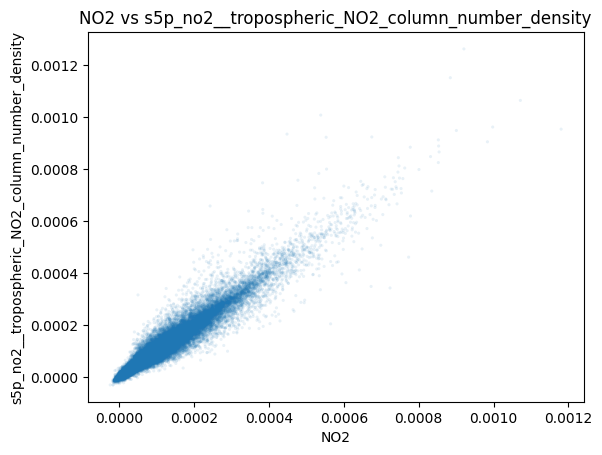

In [79]:
# Add a plot like for CO
plt.scatter(
    no2["NO2_tropos"],
    no2["s5p_no2__tropospheric_NO2_column_number_density"],
    s=5,
    alpha=0.1,
    edgecolors="none"
)
plt.title("NO2 vs s5p_no2__tropospheric_NO2_column_number_density")
plt.xlabel("NO2")
plt.ylabel("s5p_no2__tropospheric_NO2_column_number_density")
plt.show()


In [83]:
co = joined["grid_id", "date", "CO", "s5p_co__CO_column_number_density"]
co

grid_id,date,CO,s5p_co__CO_column_number_density
i64,str,f64,f64
1278,"""2023-01-01""",null,null
1279,"""2023-01-01""",null,null
1607,"""2023-01-01""",0.039788,null
1608,"""2023-01-01""",0.039801,null
1609,"""2023-01-01""",0.039939,null
…,…,…,…
108333,"""2023-01-31""",0.01272,0.012338
108334,"""2023-01-31""",0.012368,0.012338
108335,"""2023-01-31""",0.011506,0.011819


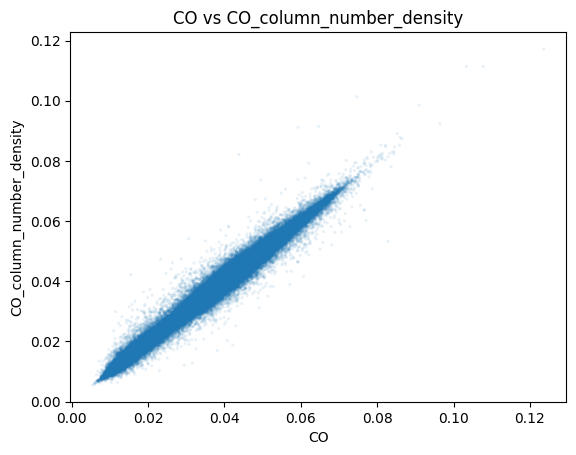

In [84]:
# Use matplotlib to plot CO against CO_column_number_density


plt.scatter(
    co["CO"], 
    co["s5p_co__CO_column_number_density"], 
    s=5, 
    alpha=0.1, 
    edgecolors="none"
)
plt.title("CO vs CO_column_number_density")
plt.xlabel("CO")
plt.ylabel("CO_column_number_density")
plt.show()
